# What makes someone successful at the Monaco Grand Prix?

#### By: Manny Bettencourt, Azam Lalani, Richard Jiang, Aman Shaik, and Alan Na

#### Introduction:

Formula 1 is the highest level of competition for single-seated car racing. It is governed by the Federation Internationale de l’Automobile, or FIA. Individual drivers compete in races across different countries, known as Grands Prix. For our project, the question we were interested in was, “What makes someone successful at the Monaco Grand Prix?” We selected the Monaco Grand Prix specifically, as it is known as the race with the narrowest turns. As Formula 1 cars have evolved to be wider over time, it has become more difficult for cars to turn and overtake on the track. It is now believed that starting position largely determines the outcome of the race. In order to test this theory, we decided to investigate the factors that make successful drivers at the race, using the data sets provided.

We will attempt to determine whether starting position determines success at the Monaco Grand Prix, by comparing the plots of driver position vs. final points scored for multiple different races, including Monaco.. By comparing them, it can help visualize whether there is a notable difference between other Formula 1 races and the Monaco Grand Prix in terms of these two variables. Additionally, we chose to investigate whether the pit stops made had a notable effect on points scored in Monaco as compared to other races as well. From the graphs created in our investigation, we found no significant difference for both variables when comparing other races to Monaco.


#### Data Description:

We used four dataset tables including Races, Results, Drivers, and Pit Stops. The races table contains identifiers of F1 races such as RaceId (which can be used to identify the specific race), year, round, circuit, name, etc., which can all be used to identify the corresponding race.  The Results dataset contains means of summarizing a finished race. Variables such as Grid, time, milliseconds, and Fastest Lap can be used to summarize and describe the outcomes of a race. The Drivers dataset contains variables that can be used to describe and identify various drivers that compete in F1 races (DriverId, driverRef, number, code, etc.). The Pit Stops dataset contains variables that can be used to describe pit stops, such as how efficient they were (time, duration, milliseconds, etc.). These datasets were useful as we could parse indvidual pieces of information that were otherwise not available if we didn’t merge them. We used Races for the name and location of the race, which was paired with RaceId. We used Drivers to retrieve the names of the drivers, as Results only contains driverId. In addition, information regarding pitstops were solely retrieved from the Pitstops dataset.  

In [1]:
#Import the necessary libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
#Import the four data tables that will be used
Races=pd.read_csv("data_raw/races.csv")
Results=pd.read_csv("data_raw/results.csv")
Drivers=pd.read_csv("data_raw/drivers.csv")
Pits =pd.read_csv("data_raw/pit_stops.csv")


#### Merging Procedure:

Pandas library’s merge function is a useful tool for combining and merging data from different datasets. The merge function can use a variety of parameters and also requires 2 dataset parameters to combine the 2 dataframes into a single DataFrame. It does this  by aligning the rows based on one or more common columns.  

For example, the code:	MergedData=pd.merge(Results,Races,how="left",on="raceId") 

Results is the first dataframe to be merged. Races is the second dataframe to be merged, “how” specifies to merge, in this case there is a “left” join. “on” specifies that the columns to be used for the join are the "raceId" columns in both data frames. 

This project used the “.merge” function numerous times to combine various pieces of information from the 4 datasets studied in the project: Races, Drivers, Pits and Results. Each of these datasets were merged after data cleaning stages to create a final major dataset labeled “FinalMerge”. By using additional data cleaning procedures, this dataset could be narrowed down to smaller and specific datasets to create various kinds of data visualizations . For example, the smaller datasets “MonacoMerged”, “ItalianMerged”, “FrenchMerged”, and ”OtherMerged” each pull specific parameterized data from the “FinalMerge” dataset. 

In [3]:
#Merge the data in order to have the location included 
MergedData=pd.merge(Results,Races,how="left",on="raceId")

MergedData.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId,year,round,circuitId
count,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000
mean,12921.334327,531.425813,261.732082,48.628328,11.179063,12.876006,1.877053,45.977515,17.568692,1990.251780,8.385991,23.486920
std,7460.682031,299.440908,268.623016,59.732131,7.243725,7.712391,4.169849,29.808951,26.155476,19.345632,4.958210,18.569371
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1950.000000,1.000000,1.000000
25%,6460.750000,293.000000,56.000000,6.000000,5.000000,6.000000,0.000000,22.000000,1.000000,1976.000000,4.000000,9.000000
50%,12920.500000,514.000000,163.000000,25.000000,11.000000,12.000000,0.000000,52.000000,11.000000,1990.000000,8.000000,18.000000
75%,19380.250000,784.000000,360.000000,58.000000,17.000000,18.000000,2.000000,66.000000,14.000000,2007.000000,12.000000,34.000000
max,25845.000000,1096.000000,856.000000,214.000000,34.000000,39.000000,50.000000,200.000000,141.000000,2022.000000,22.000000,79.000000


In [4]:
#Merge the data in order to have the name included
FinalMerge=pd.merge(MergedData,Drivers,how="left",on="driverId")

FinalMerge.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId,year,round,circuitId
count,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000
mean,12921.334327,531.425813,261.732082,48.628328,11.179063,12.876006,1.877053,45.977515,17.568692,1990.251780,8.385991,23.486920
std,7460.682031,299.440908,268.623016,59.732131,7.243725,7.712391,4.169849,29.808951,26.155476,19.345632,4.958210,18.569371
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1950.000000,1.000000,1.000000
25%,6460.750000,293.000000,56.000000,6.000000,5.000000,6.000000,0.000000,22.000000,1.000000,1976.000000,4.000000,9.000000
50%,12920.500000,514.000000,163.000000,25.000000,11.000000,12.000000,0.000000,52.000000,11.000000,1990.000000,8.000000,18.000000
75%,19380.250000,784.000000,360.000000,58.000000,17.000000,18.000000,2.000000,66.000000,14.000000,2007.000000,12.000000,34.000000
max,25845.000000,1096.000000,856.000000,214.000000,34.000000,39.000000,50.000000,200.000000,141.000000,2022.000000,22.000000,79.000000


In [5]:
PitsFinalMerge = pd.merge(FinalMerge,Pits[["raceId","driverId","stop"]],
                      how="left",on=["driverId","raceId"])


#### Data Cleaning Procedure:

Data cleaning procedures were completed in the project in order to shape the data sets into a usable and consistent format. For example, grid positions greater than 20 were removed, using the “.sort_values” and “.query” functions. This was done in order to maintain consistency in the data sets, as present-day races have no more than 20 positions. Also, the ".query" function was used to seperate the datasets into two datasets: one that contained observations for the Monaco Grand Prix and one that contained observations for all other races. Additionally, aggregate values were calculated via the “.agg” function. This was done for variables like grid position and points in order to calculate the mean values across the data. Data was then grouped using the “.groupby” function, in order to view the average point values for each starting grid position later on in the project.

In [6]:
#To have the older years compatible to the present remove the grid 
#positions greater than 20 since now there are only 20 grid position
FinalMerge=FinalMerge.sort_values(by=["surname","year"],
                                  ascending=True)

FinalMerge=FinalMerge.query("grid > 0 & grid <=20")


In [7]:
#Make subsets of Monaco Grand Prix and all other Grand Prix for pitstops
PitsMonacoMerged=PitsFinalMerge.query("name == 'Monaco Grand Prix'")

PitsOtherMerged = PitsFinalMerge.query("name ! = 'Monaco Grand Prix'")

In [8]:
#Make subsets of Monaco Grand Prix and all other Grand Prix
MonacoMerged=FinalMerge.query("name == 'Monaco Grand Prix'")

ItalianMerged=FinalMerge.query("name == 'Italian Grand Prix'")

FrenchMerged=FinalMerge.query("name == 'French Grand Prix'")

OtherMerged=FinalMerge.query("name != 'Monaco Grand Prix'")


#### Main Columns:

Our main columns analyzed were the Points, Grid Position, and Pit Stop columns. We determined Points to be an indicator of success for the drivers. Initially, we compared Points to Grid Position to test the commonly held belief that drivers with a higher grid position scored a higher number of points in the Monaco Grand Prix. However, this fact was ultimately disproved, as there was variation between grid position and average amount of points. In this scenario, the dependent variable was the Points column, and the independent variable was the Grid Position column. As a result, we searched for another factor. We found a correlation between Pit Stops and Points, as there was an inversely proportional relationship between the two (a higher amount of pit stops led to less points).  

In [9]:
#Make an aggregate showing the average grid position and points for 
#each driver
Monaco_agg1 = (MonacoMerged
                       .groupby(["surname"])
                       .agg(average_points = ('points','mean'),
                            average_grid=('grid','mean'))
                       .sort_values("average_points",ascending=False))

display(Monaco_agg1)

,average_points,average_grid
surname,,
Vettel,12.785714,5.357143
Hamilton,11.533333,5.400000
Sainz,9.500000,5.833333
Ricciardo,8.500000,7.300000
Norris,8.000000,7.333333
...,...,...
Keegan,0.000000,19.000000
Klien,0.000000,12.500000
Lammers,0.000000,13.000000


In [10]:
#Make an aggregate showing the average points for each grid position 
#and sort the values
Monaco_agg2 = (MonacoMerged
                       .groupby(["grid"])
                       .agg(average_points = ('points','mean'))
                       .sort_values("average_points",ascending=False))


display(Monaco_agg2)

,average_points
grid,
1,7.166667
2,5.970588
3,5.441176
4,4.080882
5,3.608696
6,2.159420
9,2.114286
8,1.895522
7,1.500000


In [11]:
#Make an aggregate showing the average points for each grid position
#for Monaco GP
MonacoTest = (MonacoMerged
                       .groupby(["grid"])
                       .agg(average_points = ('points','mean')))

display(MonacoTest)

,average_points
grid,
1,7.166667
2,5.970588
3,5.441176
4,4.080882
5,3.608696
6,2.159420
7,1.500000
8,1.895522
9,2.114286


In [12]:
#Make an aggregate showing the average points for each grid position
#for Italian GP
ItalianTest = (ItalianMerged
                       .groupby(["grid"])
                       .agg(average_points = ('points','mean')))

display(ItalianTest)

,average_points
grid,
1,6.300000
2,5.324324
3,5.589041
4,3.837838
5,3.253425
6,3.283784
7,2.171053
8,2.081081
9,1.527778


In [13]:
#Make an aggregate showing the average points for each grid position
#for French GP
FrenchTest = (FrenchMerged
                       .groupby(["grid"])
                       .agg(average_points = ('points','mean')))

display(FrenchTest)

,average_points
grid,
1,6.428571
2,5.129032
3,3.903226
4,3.460317
5,2.419355
6,2.171875
7,2.015873
8,0.919355
9,1.096774


In [14]:
#Make an aggregate showing the average points for each grid position
#for all GP other than Monaco
OtherTest = (OtherMerged
                       .groupby(["grid"])
                       .agg(average_points = ('points','mean')))

display(OtherTest)


,average_points
grid,
1,8.201900
2,6.811403
3,5.563622
4,4.569253
5,3.589469
6,3.194059
7,2.469638
8,1.943406
9,1.704232


In [15]:
#Make an aggregate showing the average points and average stops
#for each driver
Monaco_pitagg = (PitsMonacoMerged
                       .groupby(["driverId"])
                       .agg(average_points = ('points','mean'),
                            average_stops=('stop','mean'))
                       .sort_values("average_stops",ascending=False))

display(Monaco_pitagg)

,average_points,average_stops
driverId,,
852,0.0,2.2
849,0.0,2.2
820,0.0,2.0
845,0.0,2.0
823,0.0,2.0
...,...,...
787,0.0,NaN
792,0.0,NaN
793,3.0,NaN


In [16]:
#Make an aggregate showing the average points and average stops
#for each driver for the other Grand Prix
Other_pitagg = (PitsOtherMerged
                       .groupby(["driverId"])
                       .agg(average_points = ('points','mean'),
                            average_stops=('stop','mean'))
                       .sort_values("average_stops",ascending=False))

display(Other_pitagg)

,average_points,average_stops
driverId,,
823,0.000000,2.086957
24,0.237624,2.075000
22,1.834320,2.062500
853,0.000000,2.024390
812,0.000000,2.000000
...,...,...
804,0.000000,NaN
805,0.000000,NaN
806,0.000000,NaN


#### Results:

After cleaning the data and using merge, query, and aggregate functions to create unique datasets we created various data visualizations.  

Text(0.5, 1.0, 'Average Amount of Points Per Average Grid Position')

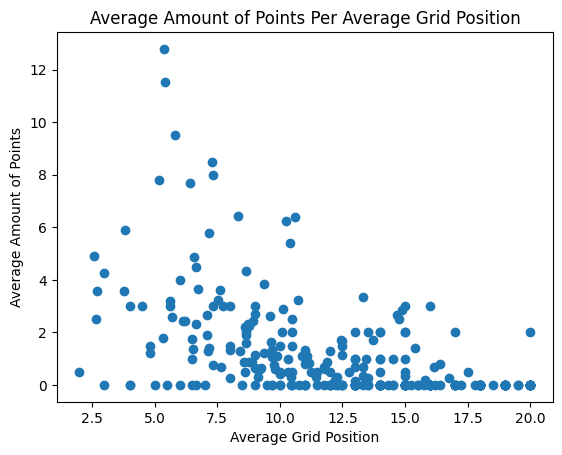

In [17]:
#Make a graph showing the correlation between average grid position and points for 
#each driver
mat.scatter(x="average_grid",y="average_points",data=Monaco_agg1)
mat.xlabel("Average Grid Position")
mat.ylabel("Average Amount of Points")
mat.title("Average Amount of Points Per Average Grid Position")

,average_points,Grid_Position
grid,,
1,7.166667,1
2,5.970588,2
3,5.441176,3
4,4.080882,4
5,3.608696,5
6,2.159420,6
7,1.500000,7
8,1.895522,8
9,2.114286,9


([<matplotlib.axis.XTick at 0x2628e9a6c10>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

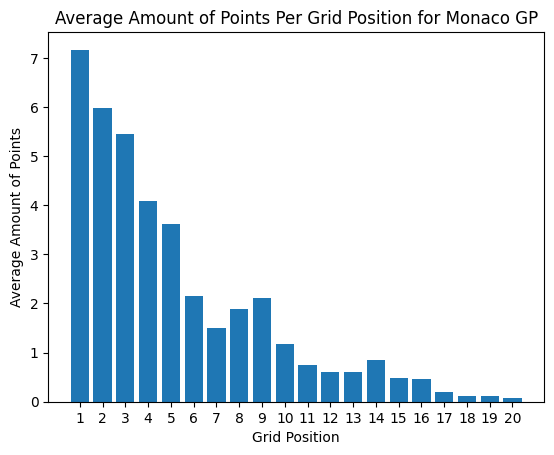

In [18]:
#Make a bar graph showing the average points for each grid position 
#for the Monaco Grand Prix
numberlist=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
MonacoTest["Grid_Position"]=numberlist
display(MonacoTest)

mat.bar(x="Grid_Position",height="average_points",data=MonacoTest)
mat.xlabel("Grid Position")
mat.ylabel("Average Amount of Points")
mat.title("Average Amount of Points Per Grid Position for Monaco GP")
mat.xticks(numberlist)



#### Results(continued):

Here one can clearly see the trend where a higher grid position leads to more points in both the aggregate table as well as the graph for the Monaco grand Prix. The magnitude of this trend will be readily apparent as one compares the above table and graph to following tables and graphs of other Grand Prix.



,average_points,Grid_Position
grid,,
1,6.300000,1
2,5.324324,2
3,5.589041,3
4,3.837838,4
5,3.253425,5
6,3.283784,6
7,2.171053,7
8,2.081081,8
9,1.527778,9


([<matplotlib.axis.XTick at 0x2628ecea410>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

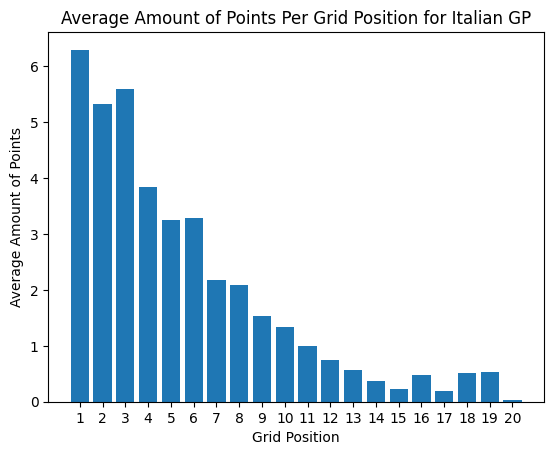

In [19]:
#Make a bargraph showing the average points for each grid position 
#for the Italian Grand Prix
ItalianTest["Grid_Position"]=numberlist
display(ItalianTest)

mat.bar(x="Grid_Position",height="average_points",data=ItalianTest)
mat.xlabel("Grid Position")
mat.ylabel("Average Amount of Points")
mat.title("Average Amount of Points Per Grid Position for Italian GP")
mat.xticks(numberlist)



,average_points,Grid_Position
grid,,
1,6.428571,1
2,5.129032,2
3,3.903226,3
4,3.460317,4
5,2.419355,5
6,2.171875,6
7,2.015873,7
8,0.919355,8
9,1.096774,9


([<matplotlib.axis.XTick at 0x262905934d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

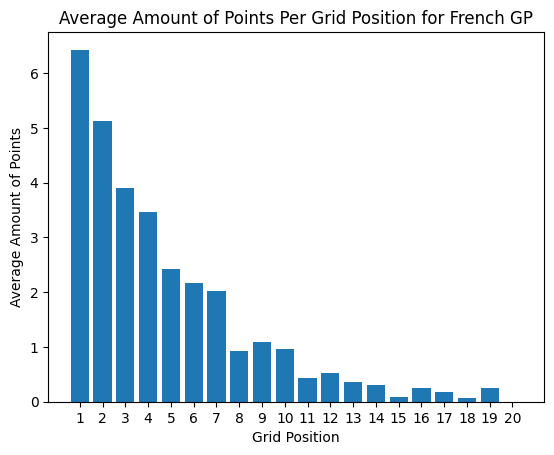

In [20]:
#Make a bargraph showing the average points for each grid position 
#for the French Grand Prix
FrenchTest["Grid_Position"]=numberlist
display(FrenchTest)

mat.bar(x="Grid_Position",height="average_points",data=FrenchTest)
mat.xlabel("Grid Position")
mat.ylabel("Average Amount of Points")
mat.title("Average Amount of Points Per Grid Position for French GP")
mat.xticks(numberlist)



#### Results(continued):

Here in the last two graphs, the Average Amount of Points per Grid position from the Italian Grand Prix and french Grand Prix are plotted. An ItalianMerged dataset was specified and pulled from the FinalMerge dataset. The Italian data was grouped by “grid” and and an “average_points” variable was computed. A bar graph was then created with grid position as the independent variable and average amount of points as the dependent variable. The same was done for the French Grand Prix. Overall these graphs showcase that there is a trend where the drivers of higher ranked grid positions result in a higher average amount of points, hovwever the magnitude of this trend is greater in the Monaco Grand Prix. 

,average_points,Grid_Position
grid,,
1,8.201900,1
2,6.811403,2
3,5.563622,3
4,4.569253,4
5,3.589469,5
6,3.194059,6
7,2.469638,7
8,1.943406,8
9,1.704232,9


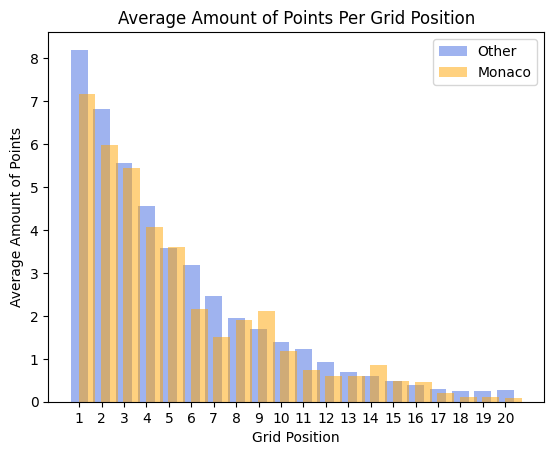

In [21]:
#Make a bar graph showing the differences between average points
#per grid position for each group of Grand Prix
OtherTest["Grid_Position"]=numberlist
display(OtherTest)

fig = mat.figure()
ax = fig.add_subplot()

indent=np.arange(20)
width = 1.35       

ax.bar(numberlist,height="average_points",width=.75,
       data=OtherTest,color=['royalblue'],alpha=.5)
ax.bar(indent+width,height="average_points",width=.75,
       data=MonacoTest,color=['orange'],alpha=.5)
ax.legend(["Other","Monaco"])
ax.set_xticks(numberlist)
mat.xlabel("Grid Position")
mat.ylabel("Average Amount of Points")
mat.title("Average Amount of Points Per Grid Position")

mat.show()


#### Results(continued):

In the code shown above, an OtherMerged dataset was pulled from the FinalMerge dataset. The query stated to select include all data not part of the Monaco Grand Prix into the OtherMerged dataset. A new bar graph was created comparing the Monaco Grand Prix results (data in orange) to the other Grand Prix’s studied. As shown in the chart, we can see that the Monaco Grand Prix results show similar trends to the other Grand Prix’s studied with minimal differences. We can see from these results that better grid position doesn't lead to a better chance of getting more points. This disproves the popular belief that a better grid position guarantees more points almost exclusively for Monaco because of its tight twist and turns. 


Text(0.5, 1.0, 'Average Amount of Points Per Average Stops for Monaco GP')

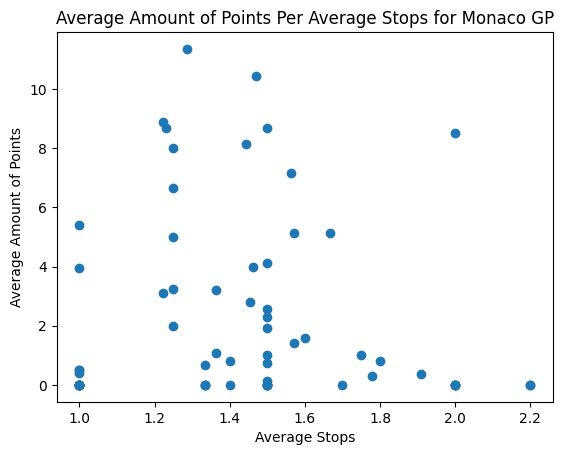

In [22]:
#Make a graph showing the correlation between average points and 
#average stops for each driver
mat.scatter(x="average_stops",y="average_points",data=Monaco_pitagg)
mat.xlabel("Average Stops")
mat.ylabel("Average Amount of Points")
mat.title("Average Amount of Points Per Average Stops for Monaco GP")


In [23]:
#Make a simple linear regression that shows the trend for the average 
#points per average pitstops in the Monaco Grand Prix
model   = smf.ols(formula = 'average_points ~  average_stops',data = Monaco_pitagg)
results = model.fit(cov_type = "HC1")

b_list = results.params
print(b_list)

Monaco_pitagg["p_estimated"] = b_list[0] + b_list[1]  * Monaco_pitagg["average_stops"]

Intercept        3.358825
average_stops   -0.689843
dtype: float64


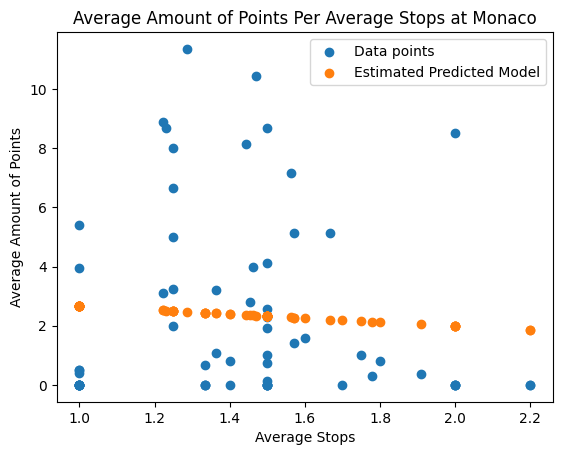

In [24]:
#Graph the simple linear regression that shows the trend for the 
#average points per average pitstops in the Monaco Grand Prix
mat.scatter(x = "average_stops",y="average_points",data=Monaco_pitagg)
mat.scatter(x = Monaco_pitagg["average_stops"],y = Monaco_pitagg["p_estimated"])
mat.legend(labels = ["Data points","Estimated Predicted Model"])
mat.xlabel("Average Stops")
mat.ylabel("Average Amount of Points")
mat.title("Average Amount of Points Per Average Stops at Monaco")
mat.show()

Text(0.5, 1.0, 'Average Amount of Points Per Average Stops at Other Circuits')

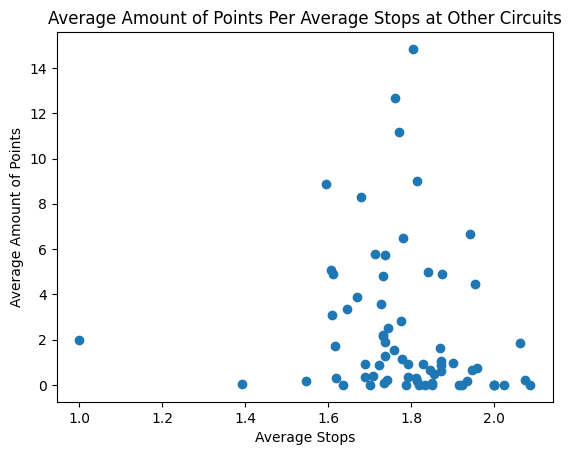

In [25]:
#Make a graph showing the correlation between average points and 
#average stops for each driver for the other Grand Prix
mat.scatter(x="average_stops",y="average_points",data=Other_pitagg)
mat.xlabel("Average Stops")
mat.ylabel("Average Amount of Points")
mat.title("Average Amount of Points Per Average Stops at Other Circuits")

#### Results(continued):

We additionally created 3 scatterplots comparing the average amount of points to average number of stops for different circuits. The first scatter plot displays the average amount of points per average stop at the Monaco Grand Prix. We also added an estimated predicted model (shown in orange in the second scatterplot) displaying the common trend between the average amount of points and average stops at Monaco. This line showcases a small negative association, that as the number of average stops increases the average amount of points tends to decrease. Lastly, we created a similar scatterplot comparing the average amount of points vs average stops for all other Grand Prix. This scatterplot showcases a trend that drivers that average close to 1.8 stops tend to score a higher average amount of points which differs from the Monaco Grand Prix. 

#### Discussion:

Going into the project, our initial thoughts were that the circuit design of the Monaco Grand Prix would influence driver strategy in ways other circuits would not. Specifically, we assumed that the tight turns in the circuit would make it very difficult for drivers in lower positions to overtake those in front of them. So, we hypothesized that the initial grid qualifying position would largely determine a driver’s performance in the race. However, after comparing the average amount of points scored by the driver in each initial grid position in the Monaco Grand Prix and other Grand Prixes, we didn’t find a significant difference. The same idea applied for pit stops in that we thought a lower number of pit stops would lead to greater winning chances. For this metric, our hypothesis was a bit more accurate as there was a slight negative trend between the average amount of points and pit stops taken at the Monaco Grand Prix, while there was no apparent trend for the other Grand Prixes. Working with this data has taught us the importance of breaking down a large dataset into smaller components, organizing them into an analyzable form, finding connections between them, and putting it all together to convey a message. Going forward, it would be interesting to investigate other factors that affect performance at various Grand Prixes, such as what kinds of tires (small, medium, hard) were used the most during certain races. 